In [1]:
using DrWatson
quickactivate(@__DIR__)

using NetHeider
using LinearAlgebra
using LightGraphs
using Plots
using DataFrames
using JLD2
using Statistics

In [110]:
res = jldopen(datadir("sims_pclose_triads_correct", "combined_results.jld2")) do file
    file["res"]
end
first(res, 10)

,inform_every,add_edges,m_filename,pr_neg,padd,measure_balance_every_step
,Float64?,#add_sin…?,String?,Float64?,Float64?,Int64?
1,0.25,add_single_edge2!,results.csv,0.05,0.01,10
2,0.25,add_single_edge2!,results.csv,0.0,0.01,10
3,0.25,add_single_edge2!,results.csv,0.15,0.01,10
4,0.25,add_single_edge2!,results.csv,0.1,0.01,10
5,0.25,add_single_edge2!,results.csv,0.25,0.01,10
6,0.25,add_single_edge2!,results.csv,0.2,0.01,10
7,0.25,add_single_edge2!,results.csv,0.3,0.01,10
8,0.25,add_single_edge2!,results.csv,0.05,0.01,10
9,0.25,add_single_edge2!,results.csv,0.0,0.01,10


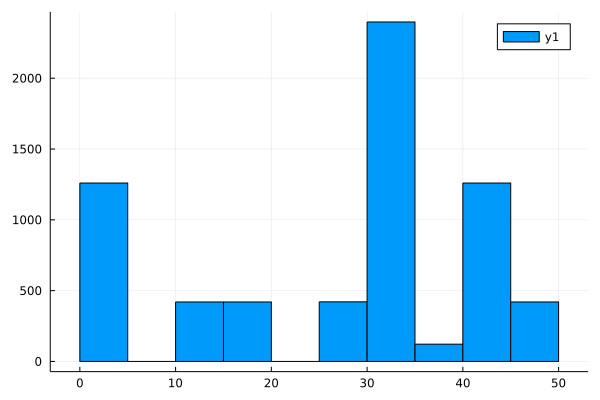

In [111]:
res.bal2bal_mean[100]
res.bu_mean[15][1,1,:]
sum(res.bu_mean[15][1,1,:])
# res.bal_unbal_table[1000][1,:,1,1]

histogram([sum(res.bu_mean[i][1,1,:]) for i in 1:nrow(res)])

In [112]:
names(res)[24:end]

11-element Vector{String}:
 "date"
 "links_num"
 "threshold"
 "bu_mean"
 "triads_num"
 "last_val"
 "unbal2bal_mean"
 "attr"
 "pn"
 "save_after"
 "path"

In [113]:
res[:, :triads_num][1]

10×100 Matrix{Int64}:
 41  37  37  37  37  37  34  33  33  …  11  11  11  11  11  11  11  11  11
 41  41  41  41  41  41  39  39  39     13  12  12  12  12  12  12  12  12
 45  45  45  40  40  40  40  35  34     15  15  15  15  15  15  15  15  15
 44  44  44  40  40  32  32  26  26     13  13  13  13  13  13  13  13  13
 45  40  40  40  40  37  37  37  35     21  21  21  21  21  21  21  21  21
 45  45  45  43  43  43  43  43  43  …  14  14  14  14  14  14  14  14  14
 45  45  42  42  42  42  42  42  41     14  14  14  14  14  14  14  14  14
 45  45  45  45  45  39  37  36  28     13  13  13  13  13  13  13  13  13
 45  39  38  38  38  36  30  25  25      9   9   9   9   9   9   9   9   9
 43  43  43  43  43  43  43  43  41     14  14  14  14  14  14  14  14  14

In [114]:
unique(res.padd)

5-element Vector{Union{Missing, Float64}}:
 0.01
 0.03
 0.05
 0.07
 0.09

In [147]:
# parameters
pn = 0.6
pclose_triad = 0.35
pr_pos = pr_neg = 0.1
padd = 0.05
threshold = [0:15...]/16

fields = Symbol.(["pn", "pclose_triad", "pr_pos", "pr_neg", "padd", "threshold"])
values = []

dict = @dict pn pclose_triad pr_pos pr_neg padd threshold

L = nrow(res)

# which_rows = zeros(Bool, L)
cropped_res = deepcopy(res)
for (field, values) in dict
    inds = findall(x->x in values, cropped_res[:, field])
    # display(length(inds))
    # display(field)
    cropped_res = cropped_res[inds,:]
end

display(nrow(cropped_res))

16

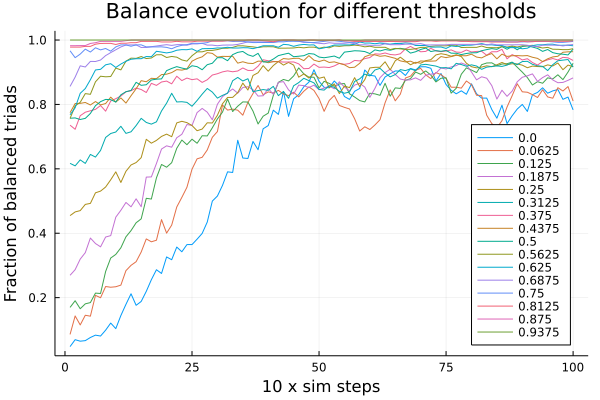

In [148]:
#balanced_mean

plot(legend = :bottomright)
for th in threshold
    ind = findall(x->x in th, cropped_res[:, :threshold])[1]
    plot!(cropped_res[ind, :balanced_mean], label = string(th))
end
plot!()
xlabel!("10 x sim steps")
ylabel!("Fraction of balanced triads")
title!("Balance evolution for different thresholds")

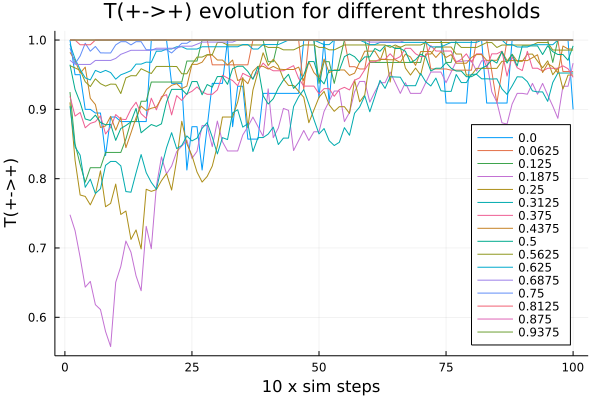

In [149]:
#bal2bal_mean, time evol

plot(legend = :bottomright)
for th in threshold
    ind = findall(x->x in th, cropped_res[:, :threshold])[1]
    plot!(cropped_res[ind, :bal2bal_mean], label = string(th))
end
plot!()
xlabel!("10 x sim steps")
ylabel!("T(+->+)")
title!("T(+->+) evolution for different thresholds")

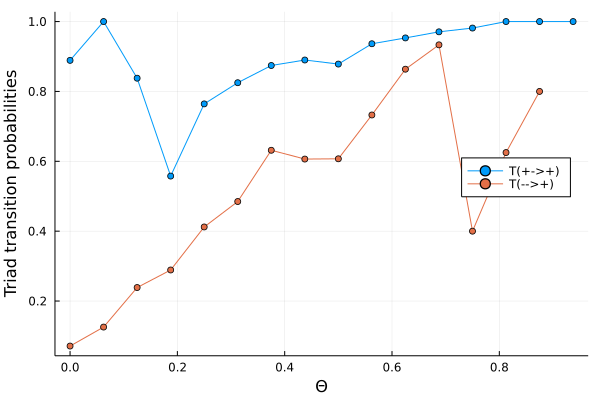

In [150]:
#bal2bal_mean, specific time

time_steps = 90
time_ind = Int(time_steps / 10)

xvals = cropped_res[:, :threshold]
yvals1 = [val[time_ind] for val in cropped_res[:, :bal2bal_mean]]
plot(xvals, yvals1, markershape = :circle, label = "T(+->+)", legend = :right)#, linestyle = :none)

yvals2 = [val[time_ind] for val in cropped_res[:, :unbal2bal_mean]]

plot!(xvals, yvals2, markershape = :circle, label = "T(-->+)")#, linestyle = :none)


# plot(legend = :bottomright)
# for th in threshold
#     ind = findall(x->x in th, cropped_res[:, :threshold])[1]
#     plot!(cropped_res[ind, :bal2bal_mean], label = string(th))
# end
# plot!()
xlabel!("Θ")
ylabel!("Triad transition probabilities")
# title!("T(+->+) evolution for different thresholds")

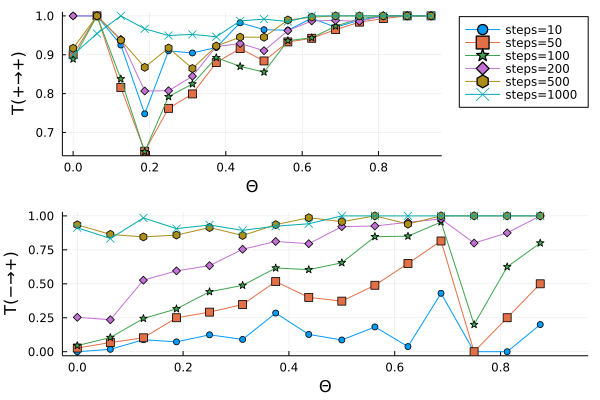

In [151]:
#bal2bal_mean, different time steps
markers = [:circle, :rect, :star5, :diamond, :hexagon, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x, :cross]

time_stepss = [10, 50, 100, 200, 500, 1000] 
time_inds = Int.(time_stepss / 10)

p1 = plot(legend = :outertopright)
ylabel!("T(+→+)")
p2 = plot(legend = false)
ylabel!("T(−→+)")
for (i, time_ind) in enumerate(time_inds)
    xvals = cropped_res[:, :threshold]
    yvals = [val[time_ind] for val in cropped_res[:, :bal2bal_mean]]
    plot!(p1, xvals, yvals, markershape = markers[i], label = "steps="*string(10*time_ind))#, linestyle = :none)

    yvals = [val[time_ind] for val in cropped_res[:, :unbal2bal_mean]]
    plot!(p2, xvals, yvals, markershape = markers[i], label = "steps="*string(10*time_ind))#, linestyle = :none)
end
plot(p1, p2, layout = (2,1))
xlabel!("Θ")
# ylabel!(["T(+->+)" "ff"])

# title!("T(+->+) evolution for different thresholds")

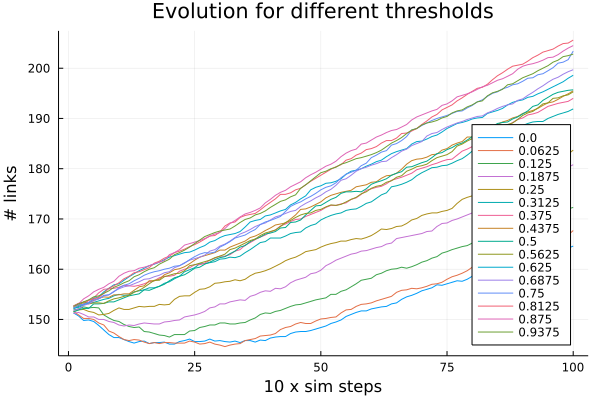

In [152]:
#links_num

plot(legend = :bottomright)
for th in threshold
    ind = findall(x->x in th, cropped_res[:, :threshold])[1]

    vals = cropped_res[ind, :links_num]'
    # display(ind)
    plot!(mean(vals, dims=2), label = string(th))
end
plot!()
xlabel!("10 x sim steps")
ylabel!("# links")
title!("Evolution for different thresholds")

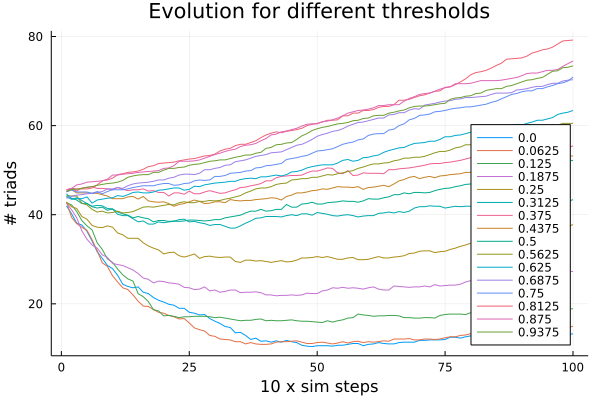

In [153]:
#triads_num

plot(legend = :bottomright)
for th in threshold
    ind = findall(x->x in th, cropped_res[:, :threshold])[1]
    vals = cropped_res[ind, :triads_num]'
    # display(ind)
    plot!(mean(vals, dims=2), label = string(th))
end
plot!()
xlabel!("10 x sim steps")
ylabel!("# triads")
title!("Evolution for different thresholds")

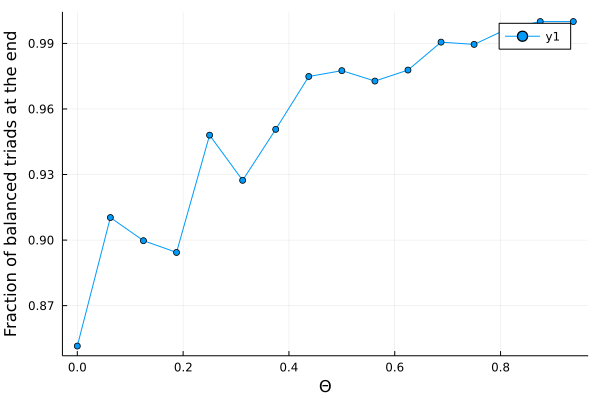

In [107]:
#last_val, specific time

# time_steps = 90
# time_ind = Int(time_steps / 10)

xvals = cropped_res[:, :threshold]
yvals1 = cropped_res[:, :last_val]
plot(xvals, yvals1, markershape = :circle)#, linestyle = :none)

# yvals2 = [val[time_ind] for val in cropped_res[:, :unbal2bal_mean]]

# plot!(xvals, yvals2, markershape = :circle, label = "T(-->+)")#, linestyle = :none)


# plot(legend = :bottomright)
# for th in threshold
#     ind = findall(x->x in th, cropped_res[:, :threshold])[1]
#     plot!(cropped_res[ind, :bal2bal_mean], label = string(th))
# end
# plot!()
xlabel!("Θ")
ylabel!("Fraction of balanced triads at the end")
# title!("T(+->+) evolution for different thresholds")

In [108]:
display(Base.summarysize(res))
usage = [Base.summarysize(res[:,name]) for name in names(res)] ./ Base.summarysize(res)

colnames = names(res)

seq = sortperm(usage, rev=true)

colnames[seq][1:6]

448600136

6-element Vector{String}:
 "bal_unbal_table"
 "balanced_table"
 "links_num"
 "triads_num"
 "bu_std"
 "bu_mean"

In [109]:
cropped_res.padd

16-element Vector{Union{Missing, Float64}}:
 0.09
 0.09
 0.09
 0.09
 0.09
 0.09
 0.09
 0.09
 0.09
 0.09
 0.09
 0.09
 0.09
 0.09
 0.09
 0.09